Epoch 1/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 379s 677ms/step - accuracy: 0.9612 - loss: 0.0997 - val_accuracy: 0.9788 - val_loss: 0.0570
Epoch 2/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 373s 674ms/step - accuracy: 0.9823 - loss: 0.0474 - val_accuracy: 0.9791 - val_loss: 0.0535
Epoch 3/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 380s 671ms/step - accuracy: 0.9862 - loss: 0.0353 - val_accuracy: 0.9788 - val_loss: 0.0551
Epoch 4/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 358s 624ms/step - accuracy: 0.9900 - loss: 0.0263 - val_accuracy: 0.9825 - val_loss: 0.0528
Epoch 5/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 338s 621ms/step - accuracy: 0.9947 - loss: 0.0165 - val_accuracy: 0.9822 - val_loss: 0.0641
110/110 ━━━━━━━━━━━━━━━━━━━━ 61s 551ms/step - accuracy: 0.9738 - loss: 0.0889
Acurácia no conjunto de teste: 0.98


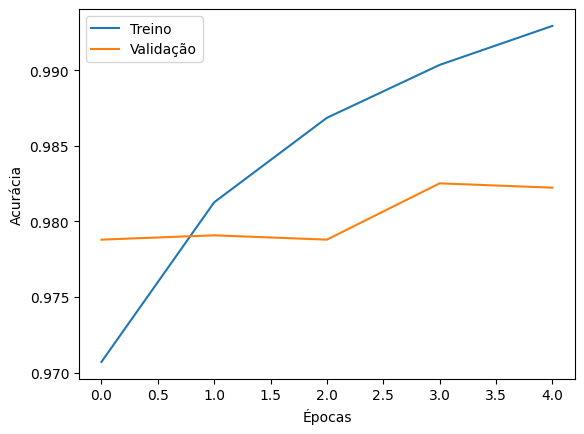

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Previsões: [2.04533166e-07 1.00000000e+00 9.99788404e-01 1.34715945e-08
 9.07495996e-05]
Labels reais: [0 1 1 0 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 50

In [2]:
# ------------------------------------------
# Transfer Learning - Exemplo Cats vs Dogs
# Bootcamp BairesDev | DIO
# ------------------------------------------

# 1. Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 2. Carregar Dataset (Cats vs Dogs via TensorFlow Datasets)
import tensorflow_datasets as tfds

(ds_train, ds_val, ds_test), ds_info = tfds.load(
    "cats_vs_dogs",
    split=["train[:70%]", "train[70%:85%]", "train[85%:]"],
    as_supervised=True,
    with_info=True,
)

# 3. Pré-processamento (resize e normalização)
IMG_SIZE = (160, 160)

def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = image / 255.0
    return image, label

ds_train = ds_train.map(preprocess).batch(32).shuffle(1000)
ds_val = ds_val.map(preprocess).batch(32)
ds_test = ds_test.map(preprocess).batch(32)

# 4. Carregar modelo pré-treinado (MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False  # Congelar camadas

# 5. Construir modelo final
inputs = keras.Input(shape=IMG_SIZE + (3,))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

# 6. Compilar modelo
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# 7. Treinar modelo
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=5
)

# 8. Avaliar modelo
loss, acc = model.evaluate(ds_test)
print(f"Acurácia no conjunto de teste: {acc:.2f}")

# 9. Gráfico de treino
plt.plot(history.history["accuracy"], label="Treino")
plt.plot(history.history["val_accuracy"], label="Validação")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
plt.show()

# 10. Teste com previsões
for image, label in ds_test.take(1):
    pred = model.predict(image)
    print("Previsões:", pred[:5].flatten())
    print("Labels reais:", label[:5].numpy())

# 11.
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Criar pasta de imagens
os.makedirs("images", exist_ok=True)

# 1. Gráfico de acurácia
plt.figure()
plt.plot(history.history["accuracy"], label="Treino")
plt.plot(history.history["val_accuracy"], label="Validação")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
plt.title("Acurácia - Treino x Validação")
plt.savefig("images/accuracy.png")
plt.close()

# 2. Gráfico de loss
plt.figure()
plt.plot(history.history["loss"], label="Treino")
plt.plot(history.history["val_loss"], label="Validação")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss - Treino x Validação")
plt.savefig("images/loss.png")
plt.close()

# 3. Matriz de confusão
y_true = []
y_pred = []
for images, labels in ds_test:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.round(preds).flatten())

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cat", "Dog"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.savefig("images/confusion_matrix.png")
plt.close()

# 4. Exemplo de previsões
plt.figure(figsize=(10, 10))
for images, labels in ds_test.take(1):
    preds = model.predict(images)
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy())
        plt.title(f"Real: {labels[i].numpy()} | Pred: {int(np.round(preds[i][0]))}")
        plt.axis("off")
plt.tight_layout()
plt.savefig("images/predictions.png")
plt.close()

print("✅ Gráficos salvos na pasta /images!")

import os
import matplotlib.pyplot as plt

# Garante que a pasta exista
os.makedirs("images", exist_ok=True)

# Exemplo de salvar gráfico de acurácia
plt.plot(history.history["accuracy"], label="Treino")
plt.plot(history.history["val_accuracy"], label="Validação")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
plt.savefig("images/accuracy.png")   # salva em /content/images
plt.close()

print("Arquivos salvos em:", os.listdir("images"))
